# The $\alpha_s$ method

Very similar to the t-plot method, the $\alpha_s$ method compares an isotherm on a porous material with one that was taken on a reference similar material, but non-porous. The reference isotherm should have a wide range of pressures to be able to interpolate the loading values at the required pressures. First, make sure the data is imported by running the previous notebook.

In [1]:
%run import.ipynb

Selected 0 samples
Selected 23 adsorbates
Selected 5 isotherms
Selected 3 isotherms
Selected 2 isotherms


Unfortunately, we don't have a reference isotherm in our data. We are instead going to be creative and assume that the adsorption on the silica ($SiO_2$ sample) is a good representation of an adsorption on a non-porous version of the MCM-41 sample. Let's try:

In [2]:
print(isotherms_n2_77k[0].sample_name)
print(isotherms_n2_77k[2].sample_name)
try:
    pygaps.alpha_s(isotherms_n2_77k[0], 
               reference_isotherm=isotherms_n2_77k[2],
               verbose=True)
except Exception as e:
    print('ERROR!:',e)

MCM-41
SiO2
ERROR!: A value in x_new is below the interpolation range.


The data in our reference isotherm is on a smaller range than that in the isotherm that we want to calculate! We are going to be creative again and first model the adsorption behaviour using a `ModelIsotherm`.

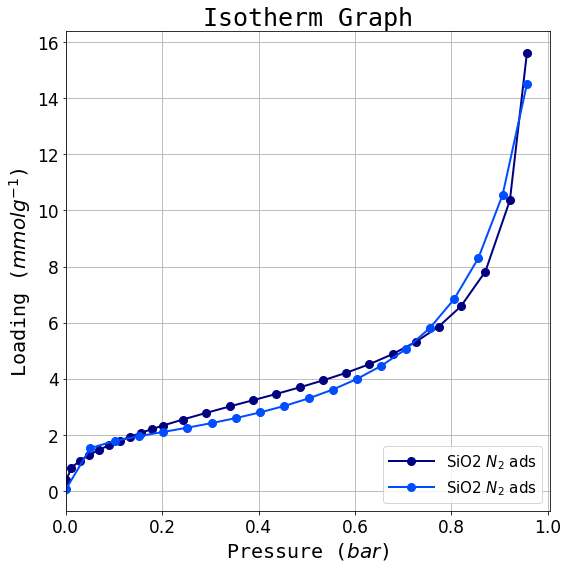

In [3]:
model = pygaps.ModelIsotherm.from_pointisotherm(isotherms_n2_77k[2], guess_model=True)

pygaps.plot_iso([isotherms_n2_77k[2], model], branch=['ads'])
plt.show()

With our model fitting the data pretty well, we can now try the $\alpha_s$ method again.

MCM-41
SiO2
For linear region 0
The slope is 0.0045 and the intercept is 0.0011 With a correlation coefficient of 0.9836
The adsorbed volume is 0.0384 and the area is 272.7744
For linear region 1
The slope is 0.0008 and the intercept is 0.0082 With a correlation coefficient of 0.953
The adsorbed volume is 0.2849 and the area is 47.3335


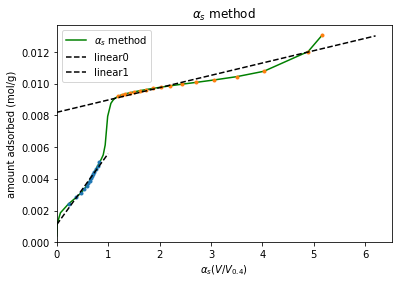

In [4]:
print(isotherms_n2_77k[0].sample_name)
print(isotherms_n2_77k[2].sample_name)
pygaps.alpha_s(isotherms_n2_77k[0], 
               model,
               verbose=True)
plt.show()

The results don't look that bad, considering all our assumptions and modelling. 

There are other parameters which can be specified for the $\alpha_s$ function such as:

- The relative pressure to use as the reducing pressure
- The known area of the reference material. If this is not specified, the BET method is used to calculate the surface area.
- As in the t-plot function, the limits for the straight line selection.

The pore size distribution is to be determined in the [next notebook](psd.ipynb).